# Data Preparation

## Import Tools & DataSets

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
sb.set() # set the default Seaborn style for graphics

In [2]:
subway_data = pd.read_csv('datasets/1_subway_data.csv')
subway_data.head()

,Unnamed: 0,Category,Serving Size (g),Calories,Total Fat (g),Saturated Fat (g),Trans Fat (g),Cholesterol (mg),Sodium (mg),Carbohydrates (g),Dietary Fiber (g),Sugars (g),Protein (g),Vitamin A % DV,Vitamin C % DV,Calcium % DV,Iron % DV
0,"6"" All-American Club",Sandwich,211,350,13,6.0,0.0,55,1220,39,1,5,25,15,15,6,20
1,"6"" Black Forest Ham",Sandwich,219,270,4,1.0,0.0,30,810,41,4,6,18,30,15,2,15
2,"6"" Buffalo Chicken (with Grilled Chicken)",Sandwich,248,340,12,3.0,0.0,55,1360,39,2,4,24,25,20,2,15
3,"6"" Chicken & Bacon Ranch (with Grilled Chicken)",Sandwich,256,510,27,10.0,0.0,100,1020,39,2,5,36,25,20,20,15
4,"6"" Chicken & Bacon Ranch (with Rotisserie-Styl...",Sandwich,256,530,29,11.0,0.0,105,1200,39,2,5,34,25,15,20,15


In [3]:
bk_data = pd.read_csv('datasets/1_burgerking_data.csv', encoding= 'unicode_escape')
bk_data.head()


,Category,Product Name,Serving Size (g),Calories,Calories from fat,Total fat (g),Saturated Fat (g),Trans Fat (g),Chol (mg),Sodium (mg),Total Carb (g),Dietary Fiber (g),Total Sugar (g),Protein (g)
0,WHOPPER SANDWICHES,WHOPPER Sandwich,270.0,660,360,40.0,12.0,1.5,90,980,49,2,11,28
1,WHOPPER SANDWICHES,WHOPPER Sandwich with Cheese,292.0,740,420,46.0,16.0,2.0,115,1340,50,2,11,32
2,WHOPPER SANDWICHES,Bacon & Cheese WHOPPER Sandwich,303.0,790,460,51.0,17.0,2.0,125,1560,50,2,11,35
3,WHOPPER SANDWICHES,DOUBLE WHOPPER Sandwich,354.0,900,520,58.0,20.0,3.0,175,1050,49,2,11,48
4,WHOPPER SANDWICHES,DOUBLE WHOPPER Sandwich with Cheese,377.0,980,580,64.0,24.0,3.0,195,1410,50,2,11,52


In [4]:
mcd_data = pd.read_csv('datasets/1_mcdonalds_data.csv')
mcd_data.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


## Data Preparation & Cleaning

First, we want to remove beverages and any other categories that may be irrelevant (e.g. Subway has _bread_).

### 1. Subway

In [5]:
subway_data.shape

(267, 17)

In [6]:
subway_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         267 non-null    object 
 1   Category           267 non-null    object 
 2   Serving Size (g)   267 non-null    int64  
 3   Calories           267 non-null    int64  
 4   Total Fat (g)      267 non-null    int64  
 5   Saturated Fat (g)  267 non-null    float64
 6   Trans Fat (g)      267 non-null    float64
 7   Cholesterol (mg)   267 non-null    int64  
 8   Sodium (mg)        267 non-null    int64  
 9   Carbohydrates (g)  267 non-null    int64  
 10  Dietary Fiber (g)  267 non-null    object 
 11  Sugars (g)         267 non-null    int64  
 12  Protein (g)        267 non-null    int64  
 13  Vitamin A % DV     267 non-null    int64  
 14  Vitamin C % DV     267 non-null    int64  
 15  Calcium % DV       267 non-null    int64  
 16  Iron % DV          267 non

In [7]:
#renaming the first column
subway_data = subway_data.rename(columns={'Unnamed: 0':'Item'})

All columns should contain numerical data, but Dietary Fiber (G) is labelled as having an object type. Based on observation of the csv, this is because some menu items have been given '<1' dietary fiber. We will replace this with '0.5', a reasonable estimate.

In [8]:
subway_data["Dietary Fiber (g)"].unique()

array(['1', '4', '2', '3', '6', '0', '12', '8', '5', '20', '<1', '7',
       '19', '26'], dtype=object)

In [9]:
subway_data.loc[subway_data['Dietary Fiber (g)'] == '<1', 'Dietary Fiber (g)'] = '0.5'
subway_data = subway_data.astype({"Dietary Fiber (g)": float}, errors='raise') 
subway_data["Dietary Fiber (g)"].unique()

array([ 1. ,  4. ,  2. ,  3. ,  6. ,  0. , 12. ,  8. ,  5. , 20. ,  0.5,
        7. , 19. , 26. ])

In [10]:
subway_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Item               267 non-null    object 
 1   Category           267 non-null    object 
 2   Serving Size (g)   267 non-null    int64  
 3   Calories           267 non-null    int64  
 4   Total Fat (g)      267 non-null    int64  
 5   Saturated Fat (g)  267 non-null    float64
 6   Trans Fat (g)      267 non-null    float64
 7   Cholesterol (mg)   267 non-null    int64  
 8   Sodium (mg)        267 non-null    int64  
 9   Carbohydrates (g)  267 non-null    int64  
 10  Dietary Fiber (g)  267 non-null    float64
 11  Sugars (g)         267 non-null    int64  
 12  Protein (g)        267 non-null    int64  
 13  Vitamin A % DV     267 non-null    int64  
 14  Vitamin C % DV     267 non-null    int64  
 15  Calcium % DV       267 non-null    int64  
 16  Iron % DV          267 non

Upon briefly exploring the data, there is minimal cleaning to do as there are no null values in the csv. However, looking at the column "Category", we can see that some of the entries are not food items that can be bought alone. For example, you cannot go to Subway and order one 'cheese'. Entries in these categories will be removed.

In [11]:
subway_data["Category"].unique()

array(['Sandwich', "Kids' Mini Sub", 'Wrap', 'Fresh Melt', 'Salad',
       'Protein Bowl', 'Breakfast', 'Flatizza ®', 'Pizza', 'Slider',
       'Bread', 'Condiment', 'Seasoning', 'Vegetable', 'Cheese',
       'Protein', 'Dessert', 'Soup'], dtype=object)

In [12]:
sub_mod = subway_data.loc[(subway_data["Category"] != "Bread")&(subway_data["Category"] != "Cheese")&(subway_data["Category"] != "Condiment")&(subway_data["Category"] != "Vegetable")&(subway_data["Category"] != "Protein")&(subway_data["Category"] != "Seasoning")]
sub_mod.shape

(190, 17)

In [13]:
sub_mod.isnull().sum()

Item                 0
Category             0
Serving Size (g)     0
Calories             0
Total Fat (g)        0
Saturated Fat (g)    0
Trans Fat (g)        0
Cholesterol (mg)     0
Sodium (mg)          0
Carbohydrates (g)    0
Dietary Fiber (g)    0
Sugars (g)           0
Protein (g)          0
Vitamin A % DV       0
Vitamin C % DV       0
Calcium % DV         0
Iron % DV            0
dtype: int64

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


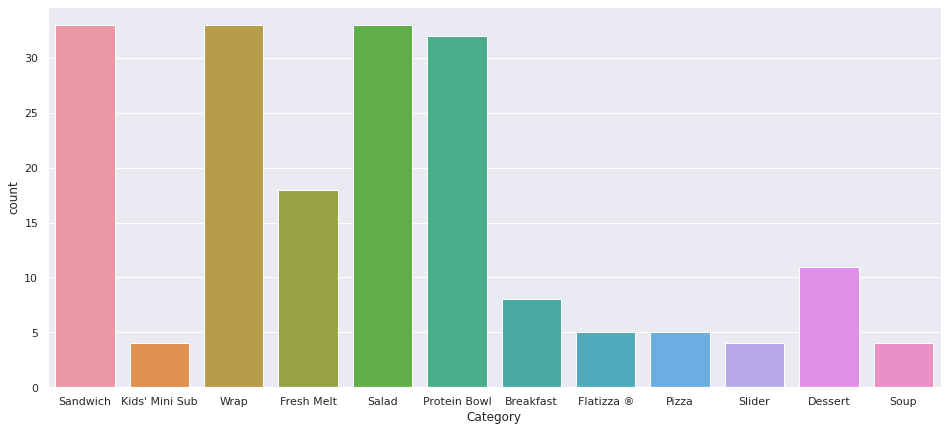

In [14]:
plt.figure(figsize=(16, 7))
sb.countplot(sub_mod["Category"])
plt.show()

### 2. McDonald's

In [15]:
mcd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Category                       260 non-null    object 
 1   Item                           260 non-null    object 
 2   Serving Size                   260 non-null    object 
 3   Calories                       260 non-null    int64  
 4   Calories from Fat              260 non-null    int64  
 5   Total Fat                      260 non-null    float64
 6   Total Fat (% Daily Value)      260 non-null    int64  
 7   Saturated Fat                  260 non-null    float64
 8   Saturated Fat (% Daily Value)  260 non-null    int64  
 9   Trans Fat                      260 non-null    float64
 10  Cholesterol                    260 non-null    int64  
 11  Cholesterol (% Daily Value)    260 non-null    int64  
 12  Sodium                         260 non-null    int

In [16]:
mcd_data['Category'].unique()

array(['Breakfast', 'Beef & Pork', 'Chicken & Fish', 'Salads',
       'Snacks & Sides', 'Desserts', 'Beverages', 'Coffee & Tea',
       'Smoothies & Shakes'], dtype=object)

In [17]:
mcd_mod = mcd_data.loc[(mcd_data['Category']!='Beverages')&(mcd_data['Category']!='Coffee & Tea')&(mcd_data['Category']!='Smoothies & Shakes')]
mcd_mod.shape

(110, 24)

In [18]:
mcd_mod.isnull().sum()

Category                         0
Item                             0
Serving Size                     0
Calories                         0
Calories from Fat                0
Total Fat                        0
Total Fat (% Daily Value)        0
Saturated Fat                    0
Saturated Fat (% Daily Value)    0
Trans Fat                        0
Cholesterol                      0
Cholesterol (% Daily Value)      0
Sodium                           0
Sodium (% Daily Value)           0
Carbohydrates                    0
Carbohydrates (% Daily Value)    0
Dietary Fiber                    0
Dietary Fiber (% Daily Value)    0
Sugars                           0
Protein                          0
Vitamin A (% Daily Value)        0
Vitamin C (% Daily Value)        0
Calcium (% Daily Value)          0
Iron (% Daily Value)             0
dtype: int64

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


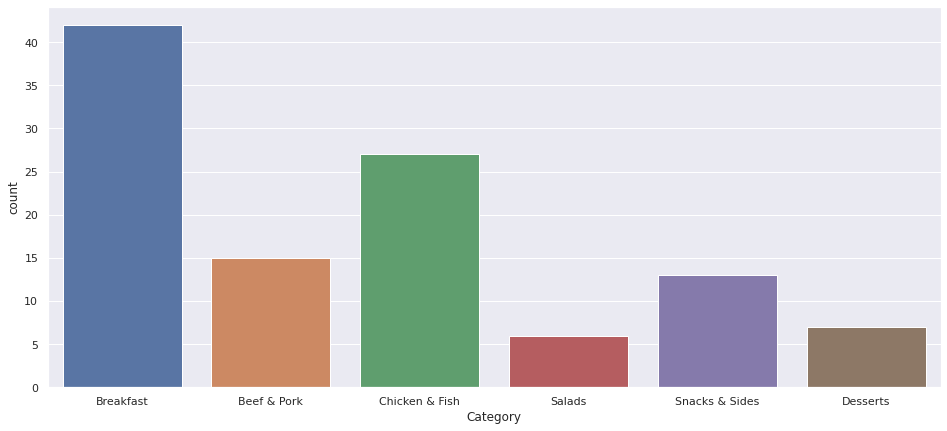

In [19]:
plt.figure(figsize=(16, 7))
sb.countplot(mcd_mod["Category"])
plt.show()

We also have to update the serving size to be grams.

In [20]:
mcd_mod['Serving Size'].replace(to_replace=r".*\(", value='', regex=True, inplace=True)
mcd_mod['Serving Size'].replace(to_replace=r" g\).*$", value='', regex=True, inplace=True)
mcd_mod['Serving Size'] = pd.to_numeric(mcd_mod['Serving Size'])
mcd_mod.head()

/shared-libs/python3.7/py/lib/python3.7/site-packages/pandas/core/series.py:4515: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,136,300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,135,250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,111,370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,161,450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,161,400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


### 3. Burger King

In [21]:
bk_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Category           108 non-null    object 
 1   Product Name       108 non-null    object 
 2   Serving Size (g)   105 non-null    float64
 3   Calories           108 non-null    int64  
 4   Calories from fat  108 non-null    int64  
 5   Total fat (g)      108 non-null    float64
 6   Saturated Fat (g)  108 non-null    float64
 7   Trans Fat (g)      108 non-null    float64
 8   Chol (mg)          108 non-null    int64  
 9   Sodium (mg)        108 non-null    int64  
 10  Total Carb (g)     108 non-null    int64  
 11  Dietary Fiber (g)  108 non-null    int64  
 12  Total Sugar (g)    108 non-null    int64  
 13  Protein (g)        108 non-null    int64  
dtypes: float64(4), int64(8), object(2)
memory usage: 11.9+ KB


In [22]:
#These beverages with null serving sizes will be excluded from the data analysis
null = bk_data[bk_data.isna().any(axis=1)]
null

,Category,Product Name,Serving Size (g),Calories,Calories from fat,Total fat (g),Saturated Fat (g),Trans Fat (g),Chol (mg),Sodium (mg),Total Carb (g),Dietary Fiber (g),Total Sugar (g),Protein (g)
61,KING JR MEALS Beverage,Fat FREE Milk (8 fl oz),NaN,90,0,0.0,0.0,0.0,5,125,13,0,12,9
62,KING JR MEALS Beverage,1% Low Fat Chocolate Milk (8 fl oz),NaN,160,25,2.5,1.5,0.0,15,150,26,0,25,8
63,KING JR MEALS Beverage,Capri Sun 100% Apple Juice (6 fl oz),NaN,80,0,0.0,0.0,0.0,0,25,20,0,20,0


In [23]:
bk_data.isnull().sum()

Category             0
Product Name         0
Serving Size (g)     3
Calories             0
Calories from fat    0
Total fat (g)        0
Saturated Fat (g)    0
Trans Fat (g)        0
Chol (mg)            0
Sodium (mg)          0
Total Carb (g)       0
Dietary Fiber (g)    0
Total Sugar (g)      0
Protein (g)          0
dtype: int64

In [24]:
bk_data["Category"].unique()

array(['WHOPPER SANDWICHES', 'FLAME BROILED BURGERS', 'CHICKEN & MORE',
       'SALADS & SIDES', 'KING JR MEALS Entrees ',
       'KING JR MEALS Side Items', 'KING JR MEALS Beverage ',
       'KING JR MEALS Desserts', 'BREAKFAST', 'Condiment'], dtype=object)

In [25]:
bk_mod = bk_data.loc[(bk_data["Category"] != "KING JR MEALS Side Items")&(bk_data["Category"] != "KING JR MEALS Beverage ")&(bk_data["Category"] != "Condiment")]
bk_mod.shape

(92, 14)

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


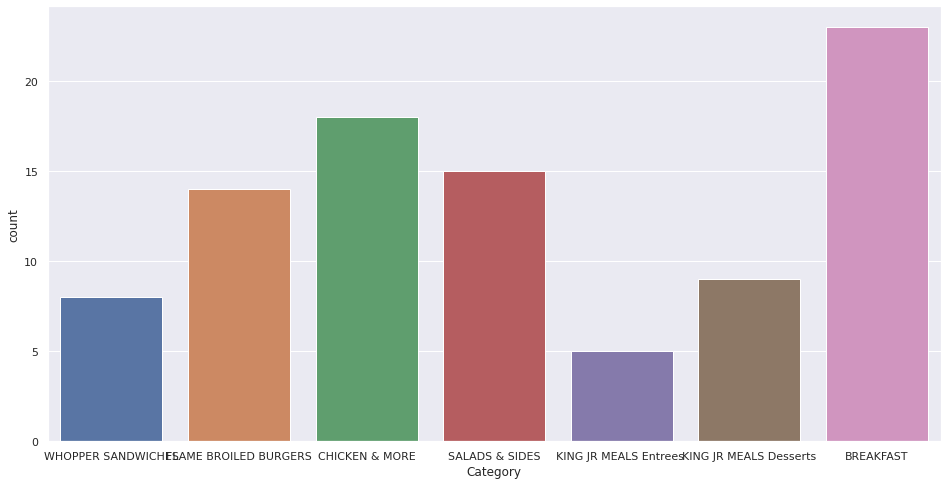

In [26]:
plt.figure(figsize=(16, 8))
sb.countplot(bk_mod["Category"])
plt.show()

In [27]:
bk_nutrition_data = pd.DataFrame(bk_mod[["Serving Size (g)","Calories","Calories from fat","Total fat (g)","Saturated Fat (g)","Trans Fat (g)","Chol (mg)","Sodium (mg)","Total Carb (g)","Dietary Fiber (g)","Total Sugar (g)","Protein (g)"]])


In [28]:
bk_nutrition_data.describe().round(2)

,Serving Size (g),Calories,Calories from fat,Total fat (g),Saturated Fat (g),Trans Fat (g),Chol (mg),Sodium (mg),Total Carb (g),Dietary Fiber (g),Total Sugar (g),Protein (g)
count,92.00,92.00,92.00,92.00,92.00,92.00,92.00,92.00,92.00,92.00,92.00,92.00
mean,179.16,486.52,261.09,29.05,9.23,0.53,88.26,929.02,38.00,2.03,8.37,18.90
std,101.65,277.99,173.99,19.37,7.60,1.06,95.34,598.26,18.54,1.77,9.08,16.59
min,14.00,60.00,20.00,2.50,0.00,0.00,0.00,95.00,2.00,0.00,0.00,0.00
25%,101.25,275.00,140.00,16.00,3.38,0.00,10.00,387.50,27.00,1.00,2.00,5.00
50%,150.50,405.00,210.00,24.00,7.00,0.00,50.00,890.00,32.00,1.50,6.00,14.50
75%,232.75,660.00,362.50,40.25,13.00,0.50,152.50,1365.00,50.00,2.25,11.00,28.00
max,461.00,1220.00,750.00,84.00,33.00,4.50,390.00,2840.00,110.00,9.00,43.00,71.00


### 4. Join Datasets

Now that we've cleaned up each dataset, we have to make sure that all three tables have the same columns.

In [29]:
sub_mod.columns

Index(['Item', 'Category', 'Serving Size (g)', 'Calories', 'Total Fat (g)',
       'Saturated Fat (g)', 'Trans Fat (g)', 'Cholesterol (mg)', 'Sodium (mg)',
       'Carbohydrates (g)', 'Dietary Fiber (g)', 'Sugars (g)', 'Protein (g)',
       'Vitamin A % DV', 'Vitamin C % DV', 'Calcium % DV', 'Iron % DV'],
      dtype='object')

In [30]:
mcd_mod.columns

Index(['Category', 'Item', 'Serving Size', 'Calories', 'Calories from Fat',
       'Total Fat', 'Total Fat (% Daily Value)', 'Saturated Fat',
       'Saturated Fat (% Daily Value)', 'Trans Fat', 'Cholesterol',
       'Cholesterol (% Daily Value)', 'Sodium', 'Sodium (% Daily Value)',
       'Carbohydrates', 'Carbohydrates (% Daily Value)', 'Dietary Fiber',
       'Dietary Fiber (% Daily Value)', 'Sugars', 'Protein',
       'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)',
       'Calcium (% Daily Value)', 'Iron (% Daily Value)'],
      dtype='object')

In [31]:
bk_mod.columns

Index(['Category', 'Product Name', 'Serving Size (g)', 'Calories',
       'Calories from fat', 'Total fat (g)', 'Saturated Fat (g)',
       'Trans Fat (g)', 'Chol (mg)', 'Sodium (mg)', 'Total Carb (g)',
       'Dietary Fiber (g)', 'Total Sugar (g)', 'Protein (g)'],
      dtype='object')

We will have to remove columns that the datasets do not share. For example, Burger King does not have Vitamin information, while subway does not have Calories From Fat information.

In [32]:
sub_common_cols = sub_mod.drop(columns=['Vitamin A % DV', 'Vitamin C % DV', 'Calcium % DV', 'Iron % DV'], axis=1)
mcd_common_cols = mcd_mod.drop(columns=['Calories from Fat','Total Fat (% Daily Value)','Saturated Fat (% Daily Value)','Cholesterol (% Daily Value)','Sodium (% Daily Value)','Carbohydrates (% Daily Value)','Dietary Fiber (% Daily Value)','Vitamin A (% Daily Value)','Vitamin C (% Daily Value)','Calcium (% Daily Value)','Iron (% Daily Value)'], axis=1)
bk_common_cols = bk_mod.drop(columns=['Calories from fat'], axis = 1)

print("Subway: ")
print(sub_common_cols.columns)
print("McDonalds: ")
print(mcd_common_cols.columns)
print("Burger King: ")
print(bk_common_cols.columns)

Subway: 
Index(['Item', 'Category', 'Serving Size (g)', 'Calories', 'Total Fat (g)',
       'Saturated Fat (g)', 'Trans Fat (g)', 'Cholesterol (mg)', 'Sodium (mg)',
       'Carbohydrates (g)', 'Dietary Fiber (g)', 'Sugars (g)', 'Protein (g)'],
      dtype='object')
McDonalds: 
Index(['Category', 'Item', 'Serving Size', 'Calories', 'Total Fat',
       'Saturated Fat', 'Trans Fat', 'Cholesterol', 'Sodium', 'Carbohydrates',
       'Dietary Fiber', 'Sugars', 'Protein'],
      dtype='object')
Burger King: 
Index(['Category', 'Product Name', 'Serving Size (g)', 'Calories',
       'Total fat (g)', 'Saturated Fat (g)', 'Trans Fat (g)', 'Chol (mg)',
       'Sodium (mg)', 'Total Carb (g)', 'Dietary Fiber (g)', 'Total Sugar (g)',
       'Protein (g)'],
      dtype='object')


We will then have to rename the columns so that they match.

In [33]:
sub_rename = {}
sub_common_colnames = sub_common_cols.rename(columns=sub_rename)

mcd_rename = {'Serving Size':'Serving Size (g)', 'Total Fat':'Total Fat (g)', 
                'Saturated Fat':'Saturated Fat (g)', 'Trans Fat':'Trans Fat (g)',
                'Cholesterol':'Cholesterol (mg)', 'Sodium':'Sodium (mg)', 'Carbohydrates':'Carbohydrates (g)',
                'Dietary Fiber':'Dietary Fiber (g)', 'Sugars':'Sugars (g)', 'Protein':'Protein (g)'}
mcd_common_colnames = mcd_common_cols.rename(columns=mcd_rename)

bk_rename = {'Product Name':'Item', 'Total fat (g)':'Total Fat (g)','Chol (mg)':'Cholesterol (mg)',
            'Total Carb (g)':'Carbohydrates (g)', 'Total Sugar (g)':'Sugars (g)'}
bk_common_colnames = bk_common_cols.rename(columns=bk_rename)

print("Subway: ")
print(sub_common_colnames.columns)
print("McDonalds: ")
print(mcd_common_colnames.columns)
print("Burger King: ")
print(bk_common_colnames.columns)

Subway: 
Index(['Item', 'Category', 'Serving Size (g)', 'Calories', 'Total Fat (g)',
       'Saturated Fat (g)', 'Trans Fat (g)', 'Cholesterol (mg)', 'Sodium (mg)',
       'Carbohydrates (g)', 'Dietary Fiber (g)', 'Sugars (g)', 'Protein (g)'],
      dtype='object')
McDonalds: 
Index(['Category', 'Item', 'Serving Size (g)', 'Calories', 'Total Fat (g)',
       'Saturated Fat (g)', 'Trans Fat (g)', 'Cholesterol (mg)', 'Sodium (mg)',
       'Carbohydrates (g)', 'Dietary Fiber (g)', 'Sugars (g)', 'Protein (g)'],
      dtype='object')
Burger King: 
Index(['Category', 'Item', 'Serving Size (g)', 'Calories', 'Total Fat (g)',
       'Saturated Fat (g)', 'Trans Fat (g)', 'Cholesterol (mg)', 'Sodium (mg)',
       'Carbohydrates (g)', 'Dietary Fiber (g)', 'Sugars (g)', 'Protein (g)'],
      dtype='object')


And now to join the tables:

In [34]:
sub_common_colnames['Restaurant'] = 'Subway'
mcd_common_colnames['Restaurant'] = 'McDonalds'
bk_common_colnames['Restaurant'] = 'Burger King'

merge1 = pd.concat([sub_common_colnames, mcd_common_colnames])
merged_data = pd.concat([merge1, bk_common_colnames])

print(sub_common_colnames.shape)
print(mcd_common_colnames.shape)
print(bk_common_colnames.shape)

print(merged_data.shape)

(190, 14)
(110, 14)
(92, 14)
(392, 14)


Seperating Categories to Breakfast/Mains/Sides

In [35]:
merged_data["Category"].unique()

array(['Sandwich', "Kids' Mini Sub", 'Wrap', 'Fresh Melt', 'Salad',
       'Protein Bowl', 'Breakfast', 'Flatizza ®', 'Pizza', 'Slider',
       'Dessert', 'Soup', 'Beef & Pork', 'Chicken & Fish', 'Salads',
       'Snacks & Sides', 'Desserts', 'WHOPPER SANDWICHES',
       'FLAME BROILED BURGERS', 'CHICKEN & MORE', 'SALADS & SIDES',
       'KING JR MEALS Entrees ', 'KING JR MEALS Desserts', 'BREAKFAST'],
      dtype=object)

In [36]:
def label_Categories(row):
    Breakfast = ['BREAKFAST', 'Breakfast']
    Mains = ['Sandwich', "Kids' Mini Sub", 'Wrap', 'Fresh Melt',
       'Protein Bowl', 'Breakfast', 'Flatizza ®', 'Pizza','Beef & Pork', 'Chicken & Fish', 'WHOPPER SANDWICHES',
       'FLAME BROILED BURGERS', 'CHICKEN & MORE',
       'KING JR MEALS Entrees ', 'BREAKFAST']
    Sides = ['Salad','Dessert', 'Soup','Slider','Salads','Snacks & Sides', 'Desserts','SALADS & SIDES', 'KING JR MEALS Desserts']
    if row["Category"] in Breakfast:
        return "Breakfast"
    elif row["Category"] in Mains:
        return "Mains"
    elif row["Category"] in Sides:
        return "Sides"

In [37]:
merged_data["Meal Type"] = merged_data.apply (lambda row: label_Categories(row), axis=1)
merged_data

,Item,Category,Serving Size (g),Calories,Total Fat (g),Saturated Fat (g),Trans Fat (g),Cholesterol (mg),Sodium (mg),Carbohydrates (g),Dietary Fiber (g),Sugars (g),Protein (g),Restaurant,Meal Type
0,"6"" All-American Club",Sandwich,211.0,350,13.0,6.0,0.0,55,1220,39,1.0,5,25,Subway,Mains
1,"6"" Black Forest Ham",Sandwich,219.0,270,4.0,1.0,0.0,30,810,41,4.0,6,18,Subway,Mains
2,"6"" Buffalo Chicken (with Grilled Chicken)",Sandwich,248.0,340,12.0,3.0,0.0,55,1360,39,2.0,4,24,Subway,Mains
3,"6"" Chicken & Bacon Ranch (with Grilled Chicken)",Sandwich,256.0,510,27.0,10.0,0.0,100,1020,39,2.0,5,36,Subway,Mains
4,"6"" Chicken & Bacon Ranch (with Rotisserie-Styl...",Sandwich,256.0,530,29.0,11.0,0.0,105,1200,39,2.0,5,34,Subway,Mains
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,Hash Browns - small,BREAKFAST,84.0,250,16.0,3.5,0.0,0,580,24,3.0,0,2,Burger King,Breakfast
94,Hash Browns - medium,BREAKFAST,169.0,500,33.0,7.0,0.0,0,1140,48,7.0,0,4,Burger King,Breakfast
95,Hash Browns - large,BREAKFAST,225.0,670,44.0,9.0,0.0,0,1530,65,9.0,0,5,Burger King,Breakfast
96,French Toast Sticks (3 piece),BREAKFAST,65.0,230,11.0,2.0,0.0,0,260,29,1.0,8,3,Burger King,Breakfast


### Removing outliers
Some of the menu items have a serving size for more than one person which would skew out analysis which is intended for items with serving size suited for one person.

In [38]:
merged_data.drop(merged_data[merged_data["Item"] == "Chicken McNuggets (40 piece)"].index, inplace = True)

In [39]:
merged_data

,Item,Category,Serving Size (g),Calories,Total Fat (g),Saturated Fat (g),Trans Fat (g),Cholesterol (mg),Sodium (mg),Carbohydrates (g),Dietary Fiber (g),Sugars (g),Protein (g),Restaurant,Meal Type
0,"6"" All-American Club",Sandwich,211.0,350,13.0,6.0,0.0,55,1220,39,1.0,5,25,Subway,Mains
1,"6"" Black Forest Ham",Sandwich,219.0,270,4.0,1.0,0.0,30,810,41,4.0,6,18,Subway,Mains
2,"6"" Buffalo Chicken (with Grilled Chicken)",Sandwich,248.0,340,12.0,3.0,0.0,55,1360,39,2.0,4,24,Subway,Mains
3,"6"" Chicken & Bacon Ranch (with Grilled Chicken)",Sandwich,256.0,510,27.0,10.0,0.0,100,1020,39,2.0,5,36,Subway,Mains
4,"6"" Chicken & Bacon Ranch (with Rotisserie-Styl...",Sandwich,256.0,530,29.0,11.0,0.0,105,1200,39,2.0,5,34,Subway,Mains
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,Hash Browns - small,BREAKFAST,84.0,250,16.0,3.5,0.0,0,580,24,3.0,0,2,Burger King,Breakfast
94,Hash Browns - medium,BREAKFAST,169.0,500,33.0,7.0,0.0,0,1140,48,7.0,0,4,Burger King,Breakfast
95,Hash Browns - large,BREAKFAST,225.0,670,44.0,9.0,0.0,0,1530,65,9.0,0,5,Burger King,Breakfast
96,French Toast Sticks (3 piece),BREAKFAST,65.0,230,11.0,2.0,0.0,0,260,29,1.0,8,3,Burger King,Breakfast


All looks good, the columns are preserved and the numbers of rows add up, so let's save it to a csv.

In [40]:
merged_data.to_csv('datasets/2_merged_data.csv', index=False)

In [41]:
merged_data.dtypes

Item                  object
Category              object
Serving Size (g)     float64
Calories               int64
Total Fat (g)        float64
Saturated Fat (g)    float64
Trans Fat (g)        float64
Cholesterol (mg)       int64
Sodium (mg)            int64
Carbohydrates (g)      int64
Dietary Fiber (g)    float64
Sugars (g)             int64
Protein (g)            int64
Restaurant            object
Meal Type             object
dtype: object

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=3cd1c4af-daef-4005-958a-27a380c5f533' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>